In [ ]:
#import thu vien
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
## Models
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
## Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from datetime import datetime
import sklearn
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import KMeans , k_means
from IPython.display import Image, display, HTML
import warnings
warnings.filterwarnings('ignore')
import plotly.io as pio

In [ ]:
!pip install apyori
from apyori import apriori

In [ ]:
!pip install mlxtend

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/processed_data.csv')

In [ ]:
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_number_lower,order_number_upper
0,2425083,49125,1,2,18,-1.0,17,1,0,13,pantry,baking ingredients,-31.921436,69.180695
1,2425083,49125,1,2,18,-1.0,91,2,0,16,dairy eggs,soy lactosefree,-31.921436,69.180695
2,2425083,49125,1,2,18,-1.0,36,3,0,16,dairy eggs,butter,-31.921436,69.180695
3,2425083,49125,1,2,18,-1.0,83,4,0,4,produce,fresh vegetables,-31.921436,69.180695
4,2425083,49125,1,2,18,-1.0,83,5,0,4,produce,fresh vegetables,-31.921436,69.180695


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2015280 entries, 0 to 2015279
Data columns (total 14 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
 12  order_number_lower      float64
 13  order_number_upper      float64
dtypes: float64(3), int64(9), object(2)
memory usage: 215.3+ MB


In [ ]:
df.isnull().sum()

,0
order_id,0
user_id,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,0
product_id,0
add_to_cart_order,0
reordered,0
department_id,0


In [ ]:
df = df.dropna()

In [ ]:
df.nunique()

,0
order_id,195930
user_id,101964
order_number,100
order_dow,7
order_hour_of_day,24
days_since_prior_order,32
product_id,134
add_to_cart_order,137
reordered,2
department_id,21


# **Clustering**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale, StandardScaler, normalize

## **Encoding**

In [ ]:
encoder = LabelEncoder()
object_col = df.select_dtypes(include='object').columns

for i in object_col:
    df[i] = encoder.fit_transform(df[i])

## **Scaling**

In [ ]:
ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df))

## **Elbow Method**

In [ ]:
wcss = {'wcss_score':[],'cluster':[]}
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, random_state = 42)
  kmeans.fit(df)
  wcss['wcss_score'].append(kmeans.inertia_)
  wcss['cluster'].append(i)

In [ ]:
wcss_df = pd.DataFrame(wcss)
wcss_df

,wcss_score,cluster
0,2.816766e+07,1
1,2.498399e+07,2
2,2.328168e+07,3
3,2.213272e+07,4
4,2.139803e+07,5
5,2.063141e+07,6
6,2.020203e+07,7
7,1.982359e+07,8
8,1.933770e+07,9
9,1.895231e+07,10


Text(0, 0.5, 'WCSS')

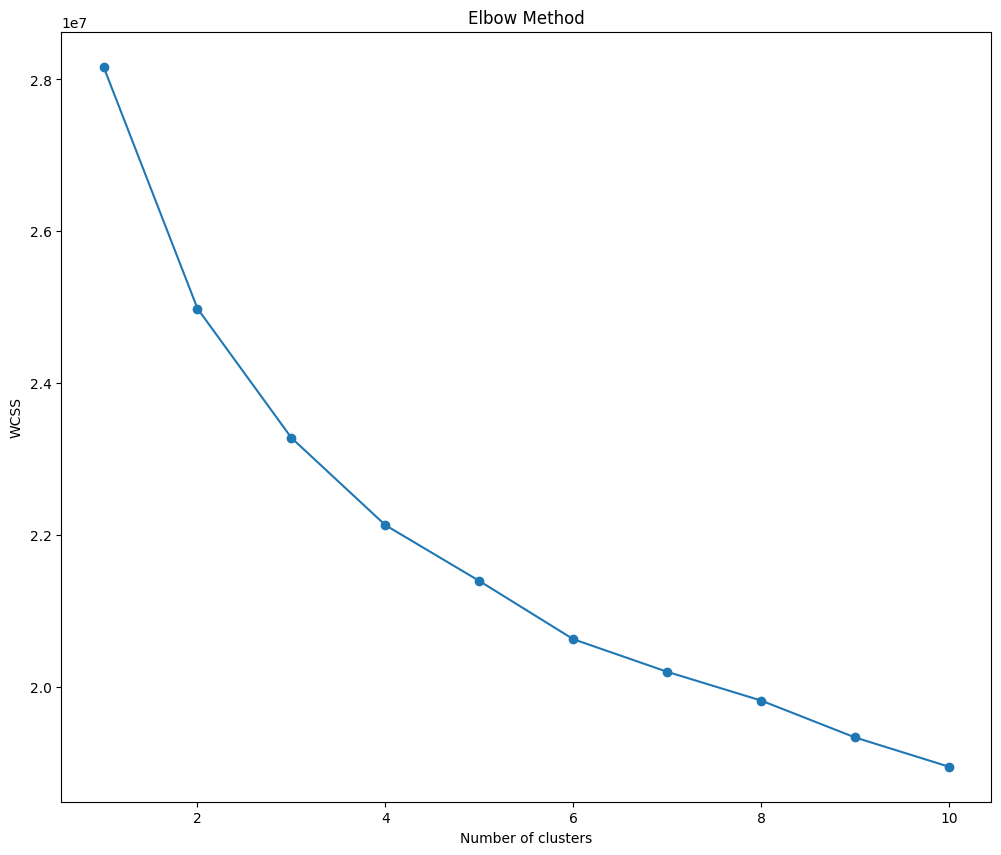

In [ ]:
plt.figure(figsize = (12,10))
plt.plot(wcss_df['cluster'],wcss_df['wcss_score'], marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
pip install kneed

In [ ]:
from kneed import KneeLocator
kl = KneeLocator(wcss_df['cluster'], wcss_df['wcss_score'], curve='convex', direction='decreasing')
print(f'Number of cluster:{kl.elbow}')

Number of cluster:4


In [ ]:
kmeans = KMeans(n_clusters = 4, random_state = 42)
y_pred = kmeans.fit_predict(df)

In [ ]:
df['Cluster'] = y_pred

In [ ]:
df['Cluster'].value_counts()

,count
Cluster,
1,614142
0,562483
3,484967
2,350384


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/processed_data.csv')
df = df.dropna()

In [ ]:
cluster_0 = df[df['Cluster']==0]
cluster_1 = df[df['Cluster']==1]
cluster_2 = df[df['Cluster']==2]
cluster_3 = df[df['Cluster']==3]

In [ ]:
cluster_0

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_number_lower,order_number_upper,Cluster
23,1201011,147243,14,0,16,3.0,83,3,1,4,produce,fresh vegetables,-14.507202,51.043788,0
24,1201011,147243,14,0,16,3.0,24,4,1,4,produce,fresh fruits,-14.507202,51.043788,0
31,1201011,147243,14,0,16,3.0,24,11,1,4,produce,fresh fruits,-14.507202,51.043788,0
33,1201011,147243,14,0,16,3.0,36,13,1,16,dairy eggs,butter,-14.507202,51.043788,0
47,2766469,58222,3,6,11,6.0,53,1,1,16,dairy eggs,cream,3.000000,3.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015254,792803,84264,5,3,13,21.0,72,16,1,13,pantry,condiments,-3.729017,19.856676,0
2015256,792803,84264,5,3,13,21.0,106,18,1,12,meat seafood,hot dogs bacon sausage,-3.729017,19.856676,0
2015262,792803,84264,5,3,13,21.0,59,24,1,15,canned goods,canned meals beans,-3.729017,19.856676,0
2015265,792803,84264,5,3,13,21.0,83,27,1,4,produce,fresh vegetables,-3.729017,19.856676,0


### Department

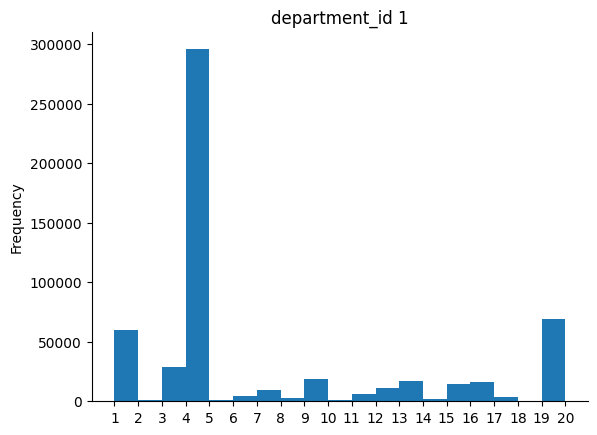

In [ ]:
cluster_0['department_id'].plot(kind='hist', bins=19, title='department_id 1')
plt.xticks(np.arange(1, 21, 1))
plt.gca().spines[['top', 'right']].set_visible(False)

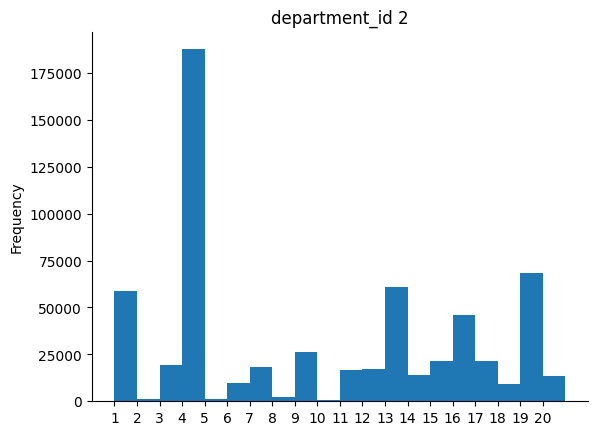

In [ ]:
cluster_1['department_id'].plot(kind='hist', bins=20, title='department_id 2')
plt.xticks(np.arange(1, 21, 1))
plt.gca().spines[['top', 'right']].set_visible(False)

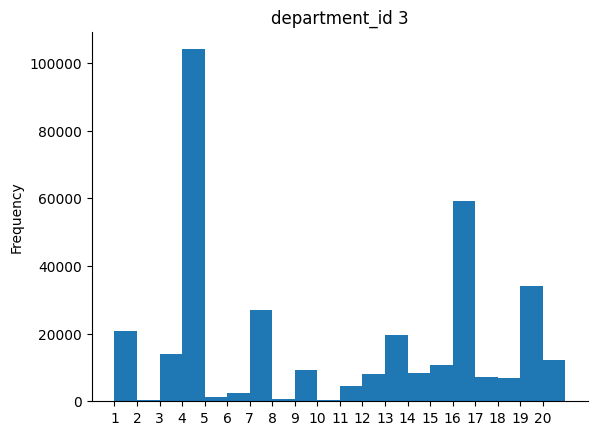

In [ ]:
cluster_2['department_id'].plot(kind='hist', bins=20, title='department_id 3')
plt.xticks(np.arange(1, 21, 1))
plt.gca().spines[['top', 'right']].set_visible(False)

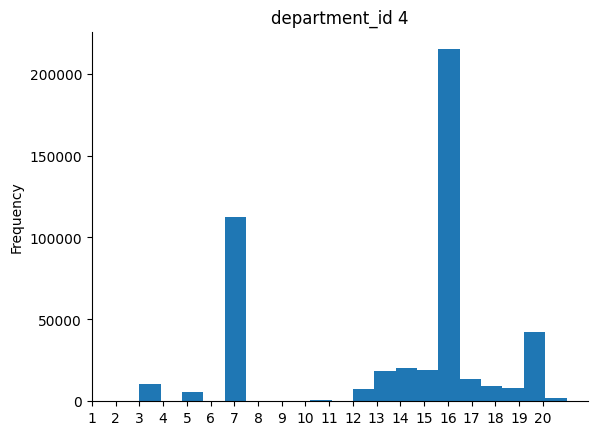

In [ ]:
cluster_3['department_id'].plot(kind='hist', bins=20, title='department_id 4')
plt.xticks(np.arange(1, 21, 1))
plt.gca().spines[['top', 'right']].set_visible(False)

### Product

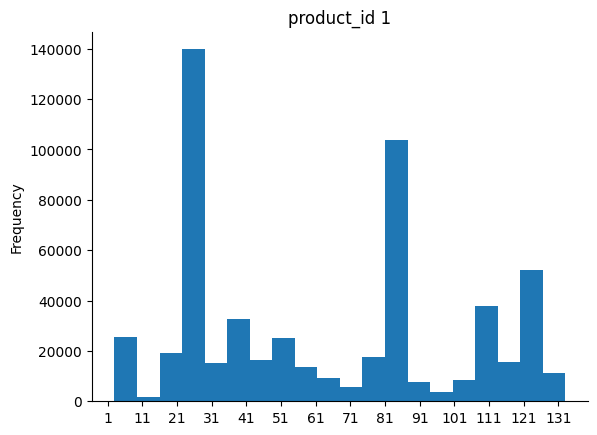

In [ ]:
cluster_0['product_id'].plot(kind='hist', bins=20, title='product_id 1')
plt.xticks(np.arange(1, 140, 10))
plt.gca().spines[['top', 'right']].set_visible(False)

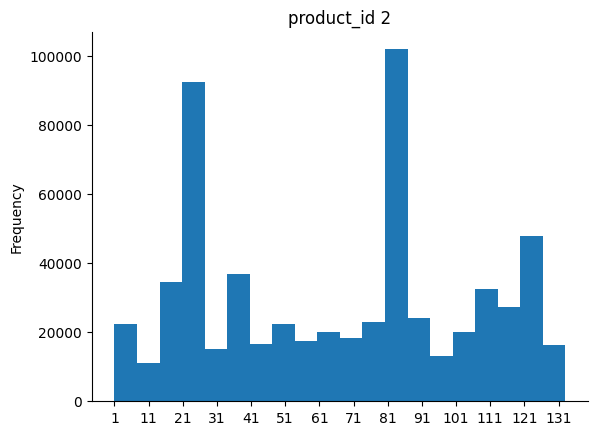

In [ ]:
cluster_1['product_id'].plot(kind='hist', bins=20, title='product_id 2')
plt.xticks(np.arange(1, 140, 10))
plt.gca().spines[['top', 'right']].set_visible(False)

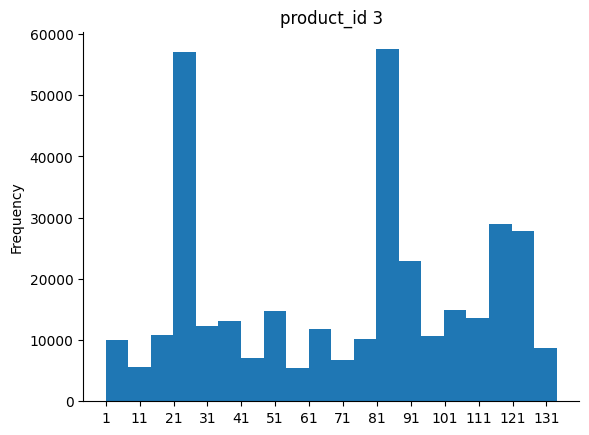

In [ ]:
cluster_2['product_id'].plot(kind='hist', bins=20, title='product_id 3')
plt.xticks(np.arange(1, 140, 10))
plt.gca().spines[['top', 'right']].set_visible(False)

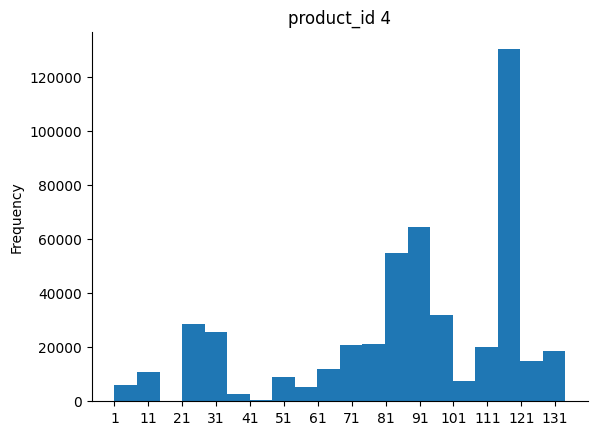

In [ ]:
cluster_3['product_id'].plot(kind='hist', bins=20, title='product_id 4')
plt.xticks(np.arange(1, 140, 10))
plt.gca().spines[['top', 'right']].set_visible(False)

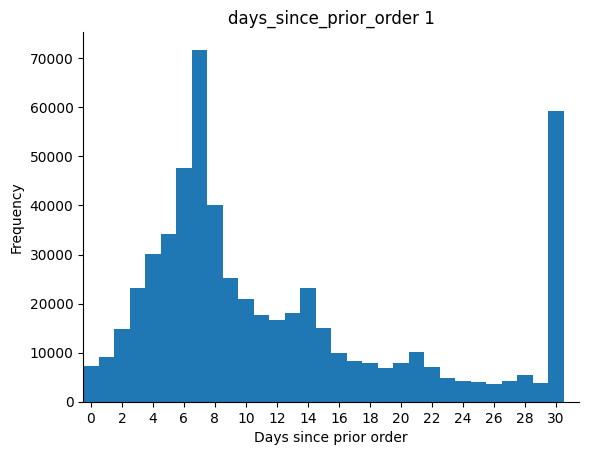

In [ ]:
cluster_0['days_since_prior_order'].plot(kind='hist', bins=32, range=(-0.5, 31.5),
                                         title='days_since_prior_order 1')

plt.xticks(range(0, 32, 2))  # Hiển thị nhãn chẵn từ 0 đến 30 để tránh quá nhiều nhãn
plt.xlim(-0.5, 31.5)  # Đặt giới hạn trục x
plt.xlabel('Days since prior order')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

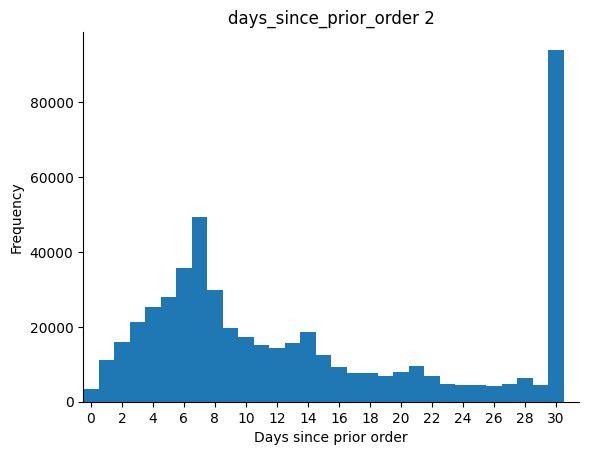

In [ ]:
cluster_1['days_since_prior_order'].plot(kind='hist', bins=32, range=(-0.5, 31.5),
                                         title='days_since_prior_order 2')

plt.xticks(range(0, 32, 2))  # Hiển thị nhãn chẵn từ 0 đến 30 để tránh quá nhiều nhãn
plt.xlim(-0.5, 31.5)  # Đặt giới hạn trục x
plt.xlabel('Days since prior order')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

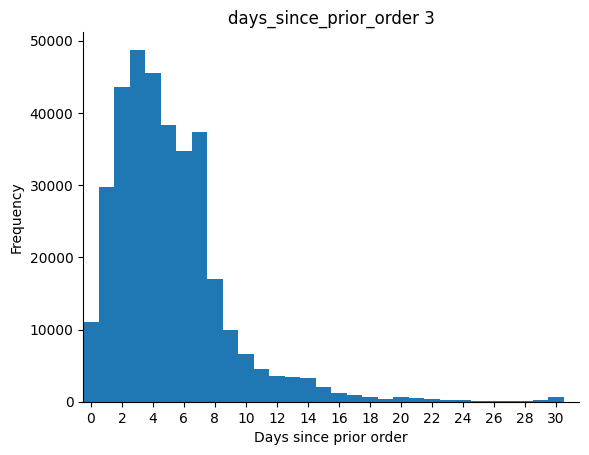

In [ ]:
cluster_2['days_since_prior_order'].plot(kind='hist', bins=32, range=(-0.5, 31.5),
                                         title='days_since_prior_order 3')

plt.xticks(range(0, 32, 2))  # Hiển thị nhãn chẵn từ 0 đến 30 để tránh quá nhiều nhãn
plt.xlim(-0.5, 31.5)  # Đặt giới hạn trục x
plt.xlabel('Days since prior order')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

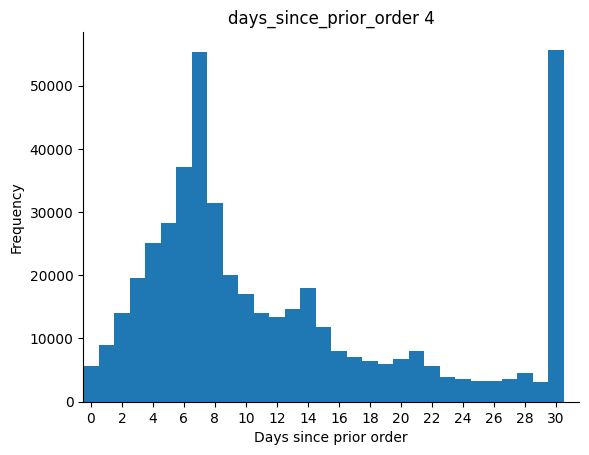

In [ ]:
cluster_3['days_since_prior_order'].plot(kind='hist', bins=32, range=(-0.5, 31.5),
                                         title='days_since_prior_order 4')

plt.xticks(range(0, 32, 2))  # Hiển thị nhãn chẵn từ 0 đến 30 để tránh quá nhiều nhãn
plt.xlim(-0.5, 31.5)  # Đặt giới hạn trục x
plt.xlabel('Days since prior order')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

# **Associate Rules**

In [ ]:
dfAR = pd.read_csv('/content/drive/MyDrive/processed_data.csv')

In [ ]:
dfAR.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_number_lower,order_number_upper
0,2425083,49125,1,2,18,-1.0,17,1,0,13,pantry,baking ingredients,-31.921436,69.180695
1,2425083,49125,1,2,18,-1.0,91,2,0,16,dairy eggs,soy lactosefree,-31.921436,69.180695
2,2425083,49125,1,2,18,-1.0,36,3,0,16,dairy eggs,butter,-31.921436,69.180695
3,2425083,49125,1,2,18,-1.0,83,4,0,4,produce,fresh vegetables,-31.921436,69.180695
4,2425083,49125,1,2,18,-1.0,83,5,0,4,produce,fresh vegetables,-31.921436,69.180695


In [ ]:
dfAR.drop('order_number_lower',axis=1,inplace=True)
dfAR.drop('order_number_upper',axis=1,inplace=True)

In [ ]:
dfAR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2015280 entries, 0 to 2015279
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.5+ MB


In [ ]:
df1 = df.groupby(by = "product_name").size().reset_index(name='Frequency').sort_values(by='Frequency', ascending=False)

In [ ]:
#Top 10 Best Selling
df1.head(10)

,product_name,Frequency
50,fresh fruits,225286
53,fresh vegetables,212069
98,packaged vegetables fruits,109270
133,yogurt,90509
93,packaged cheese,61326
83,milk,54863
131,water seltzer sparkling water,52069
25,chips pretzels,45172
119,soy lactosefree,39245
11,bread,36260


In [ ]:
df_apriori = df[["order_id", "product_name"]].sort_values(by="order_id", ascending = False)
df_apriori

,order_id,product_name
1739207,3421080,ice cream ice
1739214,3421080,butter
1739206,3421080,milk
1739208,3421080,juice nectars
1739209,3421080,fresh vegetables
...,...,...
1067804,10,fresh fruits
1067803,10,fresh herbs
1067802,10,fresh vegetables
1067811,10,fresh vegetables


In [ ]:
# create transaction list
transactions = [a[1]['product_name'].tolist() for a in list(df_apriori.groupby(['order_id']))]

In [ ]:
model_encoder = TransactionEncoder()
ls_trans = model_encoder.fit_transform(transactions)
df2 = pd.DataFrame(ls_trans, columns = model_encoder.columns_)
df2.replace([True, False], [1,0], inplace = True)
df2

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195926,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
195928,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
model_encoder = TransactionEncoder()
ls_trans = model_encoder.fit_transform(transactions)
df2 = pd.DataFrame(ls_trans, columns = model_encoder.columns_)
df2.replace([True, False], [1,0], inplace = True)
# Min Support: Để loại bỏ những itemset lạ ít xuất hiện
df_support = apriori(df2, min_support = 0.1, use_colnames = True)
df_support.sort_values("support", ascending = False)
from mlxtend.frequent_patterns import association_rules
df_associate = association_rules(df_support, metric = "lift", min_threshold = 1)
# antecedents: A (xuất hiện trước)
# consequents: B (Xuất hiện sau) A-> B
df_associate.sort_values(["support", "confidence", "lift"], ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,(fresh vegetables),(fresh fruits),0.452177,0.565202,0.323784,0.716056,1.266903,0.068213,1.531282,0.384565
4,(fresh fruits),(fresh vegetables),0.565202,0.452177,0.323784,0.572864,1.266903,0.068213,1.282551,0.484533
11,(packaged vegetables fruits),(fresh fruits),0.371868,0.565202,0.275027,0.739583,1.308529,0.064847,1.669621,0.375371
10,(fresh fruits),(packaged vegetables fruits),0.565202,0.371868,0.275027,0.486599,1.308529,0.064847,1.223474,0.542281
23,(packaged vegetables fruits),(fresh vegetables),0.371868,0.452177,0.239055,0.642849,1.421677,0.070905,1.533871,0.472202
...,...,...,...,...,...,...,...,...,...,...
32,"(fresh fruits, milk)",(fresh vegetables),0.167305,0.452177,0.101444,0.606345,1.340947,0.025793,1.391634,0.305344
36,(milk),"(fresh fruits, fresh vegetables)",0.246996,0.323784,0.101444,0.410712,1.268475,0.021471,1.147514,0.281077
33,"(fresh fruits, fresh vegetables)",(milk),0.323784,0.246996,0.101444,0.313309,1.268475,0.021471,1.096568,0.312995
37,(fresh vegetables),"(fresh fruits, milk)",0.452177,0.167305,0.101444,0.224347,1.340947,0.025793,1.073541,0.464125
